In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math


In [16]:
from Bio import SeqIO
import seaborn as sns
f_path = 'C:\\Users\\alpha\\Documents\\jennifer\\maths\\SRIM\\code\\diamond-windows\\jennifer_genomes.nr.fasta'

with open(f_path, mode='r') as handle:
    ind=0
    for record in SeqIO.parse(handle, 'fasta'):

        # Extract individual parts of the FASTA record
        ind=ind+1

In [17]:
ind

760729

In [8]:
# matches_df = pd.read_csv('C:\\Users\\alpha\\Documents\\jennifer\\maths\\SRIM\\code\\diamond-windows\\matches.tsv',header=None, sep='\t')
matches_df = pd.read_csv('C:\\Users\\alpha\\Documents\\jennifer\\maths\\SRIM\\code\\diamond-windows\\matches.tsv',names=['qid', 'sid', 'pident', 'qlength', 'qstart', 'qend', 'slength', 'sstart', 'send', 'evalue', 'bitscore'], sep='\t')


In [9]:
matches_df

,qid,sid,pident,qlength,qstart,qend,slength,sstart,send,evalue,bitscore
0,accn|CP129981_1,PUL0121_8,37.1,669,4,657,667,10,666,2.570000e-126,387.0
1,accn|CP129981_2,PUL0106_2,30.9,190,40,162,174,41,159,1.610000e-07,47.4
2,accn|CP129981_7,PUL0269_4,33.3,117,13,114,124,17,122,1.970000e-11,55.1
3,accn|CP129981_9,PUL0460_101,28.8,162,10,160,166,8,159,1.190000e-19,79.0
4,accn|CP129981_9,PUL0460_102,24.6,162,12,149,154,18,151,5.760000e-10,53.1
...,...,...,...,...,...,...,...,...,...,...,...
1839472,accn|JAUDZE010000025_2,PUL0184_16,33.3,260,1,253,272,7,264,2.190000e-39,136.0
1839473,accn|JAUDZE010000025_2,PUL0339_2,31.0,260,84,251,271,88,257,4.590000e-21,87.8
1839474,accn|JAUDZE010000025_2,PUL0302_11,32.5,260,90,251,297,104,272,4.880000e-21,88.2
1839475,accn|JAUDZE010000025_2,PUL0468_19,27.9,260,93,251,239,67,229,4.380000e-10,56.6


Columns: qid, sid, pident, qlength, qstart, qend, slength, sstart, send, evalue, bitscore

Histogram of pident vs evalue (cols '2' vs '9')

In [14]:
type(matches_df.iloc[:,2])

pandas.core.series.Series

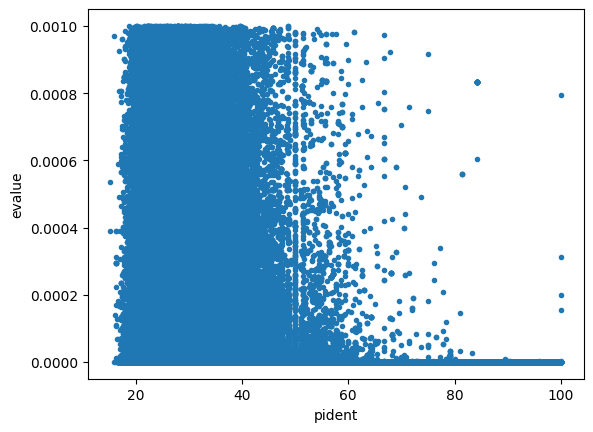

In [21]:
plt.scatter(np.array(matches_df.iloc[:,2]), np.array(matches_df.iloc[:,9]), marker='.')
plt.xlabel('pident')
plt.ylabel('evalue')
plt.show()

Histogram of percentage identity (pident):

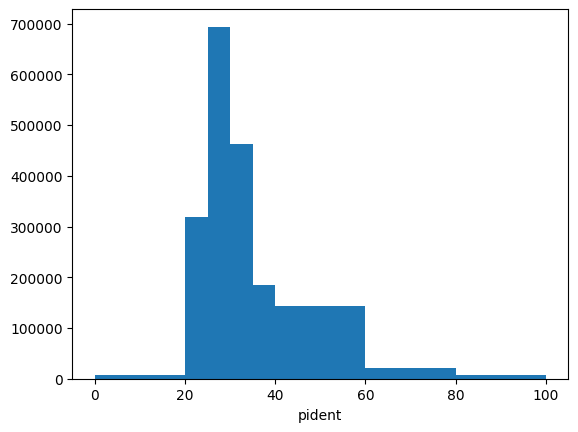

In [45]:
plt.hist(np.array(matches_df.iloc[:,2]), bins=[0,20,25,30,35,40,60,80,100])
plt.xlabel('pident')
plt.show()

Histogram of E-value:

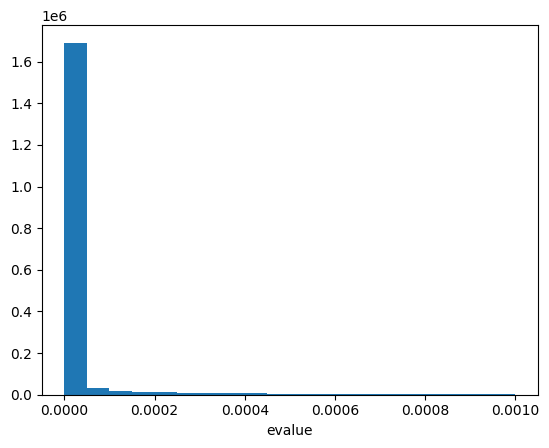

In [46]:
plt.hist(np.array(matches_df.iloc[:,9]), bins=20)
plt.xlabel('evalue')
plt.show()

Instead try histogram of log E-value:

C:\Users\alpha\AppData\Local\Temp\ipykernel_6324\4277765861.py:1: RuntimeWarning: divide by zero encountered in log
  plt.hist(np.log(np.array(matches_df.iloc[:,9])), bins=100, range=[-500,0])


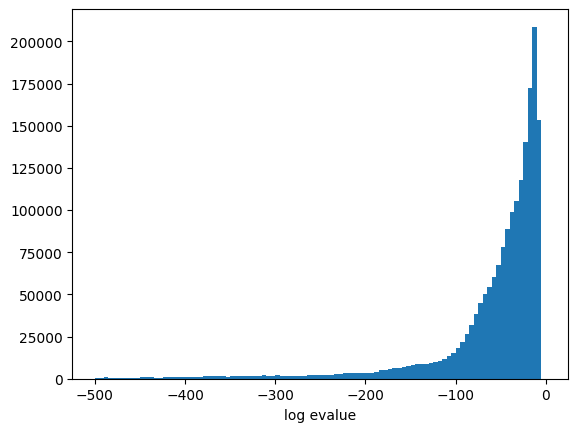

In [52]:
plt.hist(np.log(np.array(matches_df.iloc[:,9])), bins=100, range=[-500,0])
plt.xlabel('log evalue')
plt.show()

### 2D histogram of evalue vs pident:

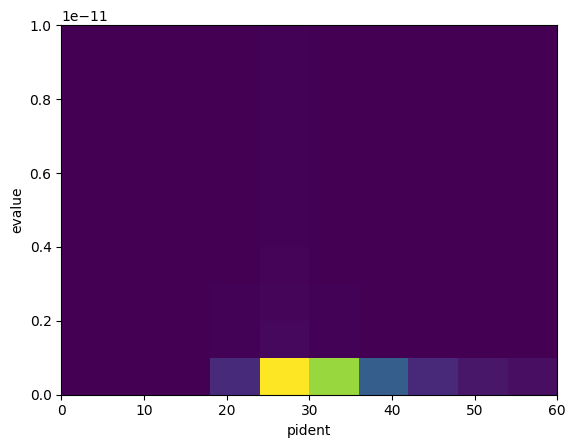

In [42]:
plt.hist2d(np.array(matches_df.iloc[:,2]),np.array(matches_df.iloc[:,9]),bins=[10,10], range=[[0,60],[0,0.1e-10]])
plt.xlabel('pident'), plt.ylabel('evalue')
plt.show()

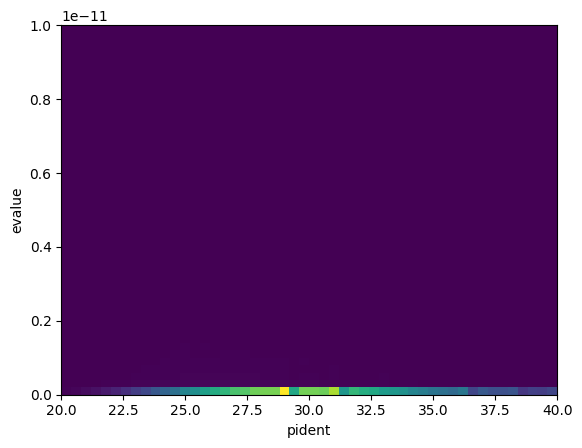

In [43]:
plt.hist2d(np.array(matches_df.iloc[:,2]),np.array(matches_df.iloc[:,9]),bins=[50,50], range=[[20,40],[0,0.1e-10]])
plt.xlabel('pident'), plt.ylabel('evalue')
plt.show()

In [44]:
np.array(matches_df.iloc[:,9])

array([2.57e-126, 1.61e-007, 1.97e-011, ..., 4.88e-021, 4.38e-010,
       8.73e-007])

### 2D histogram of evalue vs coverage: